In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\KIIT\Desktop\project\spam.csv")

In [5]:
df.sample(3)

,Category,Message
832,ham,Hi mate its RV did u hav a nice hol just a mes...
4695,ham,Pls give her the food preferably pap very slow...
1617,ham,"K, makes sense, btw carlos is being difficult ..."


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
prop = df.Category.value_counts(normalize=True)

<AxesSubplot:ylabel='Category'>

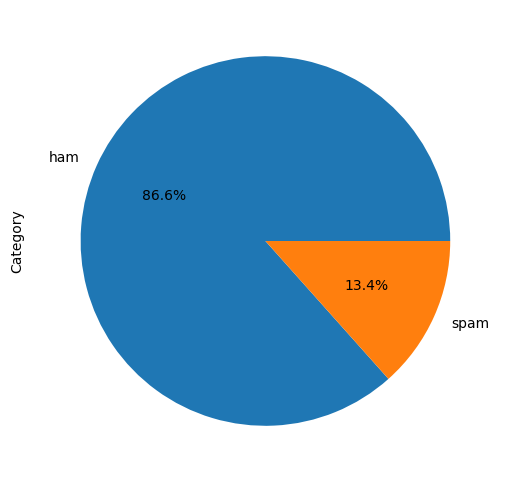

In [10]:
prop.plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))

In [11]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [12]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols= 'Category', use_cat_names=True)
df = encoder.fit_transform(df)
df.sample(3)


,Category_ham,Category_spam,Message
5111,1,0,I've reached sch already...
3743,1,0,Hey i'm bored... So i'm thinking of u... So wa...
1978,0,1,Reply to win £100 weekly! Where will the 2006 ...


In [13]:
df.drop(['Category_ham'], axis=1)


,Category_spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, 
df.Category_spam, test_size = 0.2, random_state = 10)
print("Size of X_train = ", X_train.shape[0])
print("Size of X_test = ", X_test.shape[0])
print("Size of y_train = ", y_train.shape[0])
print("Size of y_test = ", y_test.shape[0])


Size of X_train =  4457
Size of X_test =  1115
Size of y_train =  4457
Size of y_test =  1115


In [16]:
x_train,x_test,y_train,y_test=train_test_split(df.Message,df.Category_spam,test_size=0.2, random_state=10,stratify=df.Category_spam)
print("Ham spam proportion of train data set\n",
    y_train.value_counts(normalize=True),
    "Ham spam proportion of test data set\n",
    y_test.value_counts(normalize=True),
    "Ham spam proportion of full data set\n",
    df['Category_spam'].value_counts(normalize=True))


Ham spam proportion of train data set
 0    0.865829
1    0.134171
Name: Category_spam, dtype: float64 Ham spam proportion of test data set
 0    0.866368
1    0.133632
Name: Category_spam, dtype: float64 Ham spam proportion of full data set
 0    0.865937
1    0.134063
Name: Category_spam, dtype: float64


In [17]:
df["Category_spam"].value_counts(normalize=True)

0    0.865937
1    0.134063
Name: Category_spam, dtype: float64

In [18]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x_train_count = vectorizer.fit_transform(x_train.values)
X_train_count = x_train_count.toarray()

print(X_train_count[:3])



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
from sklearn.naive_bayes import MultinomialNB
# build our model using Multinomial Naïve Bayes Classifier
model = MultinomialNB()
# train our model using train set data
model.fit(X_train_count, y_train)



MultinomialNB()

In [22]:
X_test_count = vectorizer.transform(X_test)
model.predict(X_test_count)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
model.score(X_train_count, y_train)

0.9932690150325331

In [24]:
from sklearn.model_selection import cross_val_score
cross = cross_val_score(model, X_train_count, y_train, 
cv = 10, scoring = "accuracy")
print("Accuracy of 10 folds\n", cross)
print("Average Accuracy =", cross.mean())

Accuracy of 10 folds
 [0.97309417 0.97309417 0.98206278 0.98654709 0.98430493 0.95515695
 0.98206278 0.97752809 0.97752809 0.98426966]
Average Accuracy = 0.9775648712651787


In [25]:
#import confusion matrix class
from sklearn.metrics import confusion_matrix
# predictions for training data
y_train_pred = model.predict(X_train_count)
# create a confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[3851,    8],
       [  22,  576]], dtype=int64)

In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Text(36.25, 0.5, 'Truth')

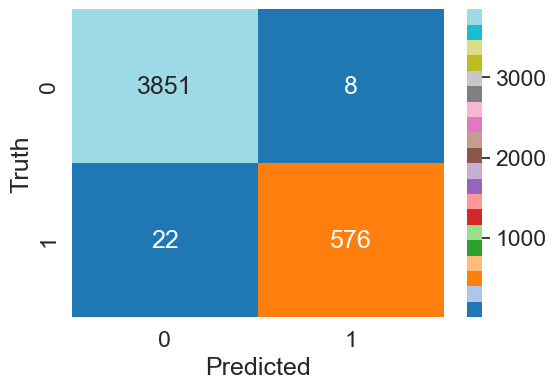

In [27]:
import seaborn as sn
plt.figure(figsize = (6, 4))
sn.set(font_scale = 1.5)
sn.heatmap(cm, cmap="tab20", annot = True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy of our model: ",accuracy_score(y_train,y_train_pred))

Accuracy of our model:  0.9932690150325331


In [29]:
# training error rate
1 - accuracy_score(y_train, y_train_pred)

0.006730984967466935

In [30]:
#training precision
from sklearn.metrics import precision_score
precision_score(y_train, y_train_pred)

0.9863013698630136

In [31]:
# training recall
from sklearn.metrics import recall_score
recall_score(y_train, y_train_pred)


0.9632107023411371

In [32]:
# training f1-score
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)


0.9746192893401014

In [33]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3859
           1       0.99      0.96      0.97       598

    accuracy                           0.99      4457
   macro avg       0.99      0.98      0.99      4457
weighted avg       0.99      0.99      0.99      4457



In [34]:
x_test_count= vectorizer.transform(x_test.values)
x_test_count.toarray()
x_test_count[:3]


<3x7704 sparse matrix of type '<class 'numpy.int64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [35]:
y_test_predicted=model.predict(x_test_count)
cm_test= confusion_matrix(y_test,y_test_predicted)
cm_test


array([[961,   5],
       [  8, 141]], dtype=int64)

Text(23.75, 0.5, 'Truth')

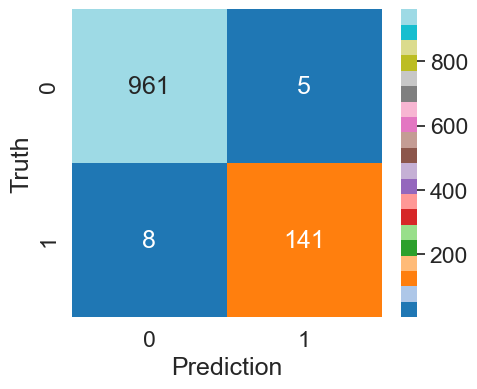

In [36]:
# Visualizing the confusion matrix of the test data results
plt.figure(figsize=(5,4))
sn.set(font_scale=1.5)
sn.heatmap(cm_test,cmap="tab20",annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")


In [37]:
# accuracy
accuracy_score(y_test,y_test_predicted)

0.9883408071748879

In [38]:
precision_score(y_test, y_test_predicted)


0.9657534246575342

In [67]:
recall_score(y_test, y_test_predicted)


0.9463087248322147

In [40]:
# classification report
print(classification_report(y_test, y_test_predicted))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [73]:
#exporting model as a pickle file
import pickle
with open("spam detector","wb") as f:
    pickle.dump(model,f)


In [86]:
# Load model using pickle
with open ('spam_detector', 'rb') as f:
     model_object = pickle.load(f)
         

In [87]:
    model_object

MultinomialNB()

In [ ]:
# classify new mail in to ham and spam.
sent = input("Write your mail...\n")
emails = []
emails.append(sent)
emails_count = v.transform(emails)
pred = model.predict(emails_count)
if pred[0] == 0:
 print("This mail is ham.")
elif pred[0] == 1:
 print("This mail is spam.")

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))
st.title("Email/SMS Spam Classifier")
input_sms = st.text_area("Enter the message")
if st.button('Predict'):
    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam")
    else:
        st.header("Not Spam")

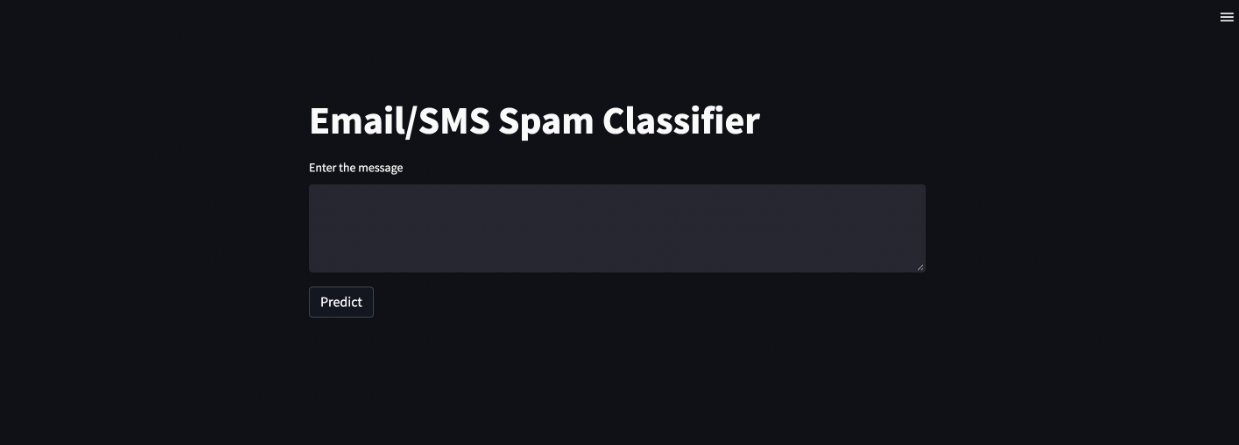